In [1]:
from preprocess.kepler_io import *
from utils.functions import *
from utils.fold import *
from utils.bin import *
import matplotlib.pyplot as plt 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
plt.tight_layout()

import lightkurve

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
csv_filename = f"C:/Users/User/dev/data/{csv_name}"
csv_clean = 'C:/Users/User/dev/data/q1_q17_dr24_tce_clean.csv'
img_dir = "C:/Users/User/Desktop/images"

In [4]:
df = pd.read_csv(csv_filename, comment='#')
df.head()

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
0,1162345,2,NaN,0.831850,0.000067,132.227,0.035197,0.92600,1.471,2.392,21.0000,6.092,2.636,2.950,0.5099,0.7944,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
1,1292087,2,NaN,1.095240,0.000010,132.133,0.002685,0.25630,13.310,2.122,0.4755,34.530,4.427,10.600,0.8916,0.6361,2310.0,661.0,NaN,NaN,6328.0,207.0,4.15,0.29,1.502,0.852,UNK
2,1293031,2,NaN,0.719273,0.000014,132.227,0.002786,0.70000,1.103,1.521,0.3183,29.680,5.248,8.302,1.4550,0.4296,3330.0,703.0,NaN,NaN,6363.0,214.0,3.80,0.35,2.489,1.036,UNK
3,1162345,3,NaN,0.831833,0.000009,131.919,0.002209,0.09536,51.770,2.181,1.2110,27.100,3.550,11.950,0.9062,0.8488,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
4,1164109,1,NaN,622.408000,0.008547,162.256,0.009840,0.00319,2193.000,12.010,1.8430,161.300,59.080,3.719,2.1140,2.5990,302.0,75.0,NaN,NaN,6609.0,200.0,4.11,0.28,1.654,0.816,UNK


In [5]:
kepids = get_kepler_ids_from_csv()

Text(0, 0.5, 'Normalized Flux')

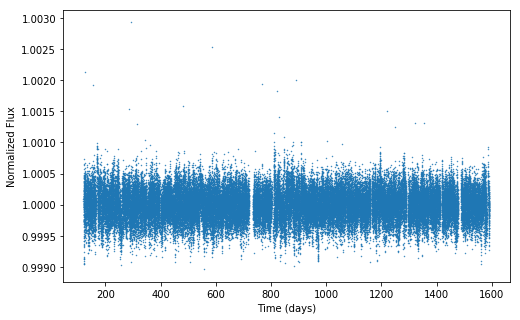

In [6]:
time, flux = get_time_flux_by_ID(1162345)
plt.figure(figsize=(8, 5))
plt.plot(time, flux, '.', ms=0.9)
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')
# plt.savefig(os.path.join(img_dir,'1164109_time_flux.png'), dpi=200)

In [7]:
df[df['kepid']==1162345]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
0,1162345,2,NaN,0.831850,0.000067,132.227,0.035197,0.92600,1.4710,2.392,21.000,6.092,2.636,2.950,0.5099,0.7944,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
3,1162345,3,NaN,0.831833,0.000009,131.919,0.002209,0.09536,51.7700,2.181,1.211,27.100,3.550,11.950,0.9062,0.8488,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
22,1162345,1,NaN,0.831777,0.000011,131.698,0.002556,0.87440,0.3894,2.349,1.751,24.270,3.455,8.812,0.9762,0.2497,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP


In [25]:
kepid = 1164109 
# kepid = 11442793

In [9]:
while True:
    kepid = get_PC_IDs()[0]
    d = get_period_by_IDs(kepid)
    if len(d[kepid]) > 1:
        print(kepid)
        break

008120608


In [10]:
get_period_by_IDs('009347899')

{'009347899': [('1', 20.8602), ('1', 42.6342), ('1', 87.6475), ('1', 9.6173)]}

In [11]:
df[df['kepid']==1164109]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
4,1164109,1,NaN,622.408,0.008547,162.256,0.00984,0.00319,2193.0,12.01,1.843,161.3,59.08,3.719,2.114,2.599,302.0,75.0,NaN,NaN,6609.0,200.0,4.11,0.28,1.654,0.816,UNK


In [26]:
time, flux = get_time_flux_by_ID(kepid)

In [27]:
t, f = flatten_interp_transits(time, flux, 622.408 , 162.256, 12.01/24)

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\lightkurve\lightcurve.py:208: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,


Text(0, 0.5, 'Normalized Flux')

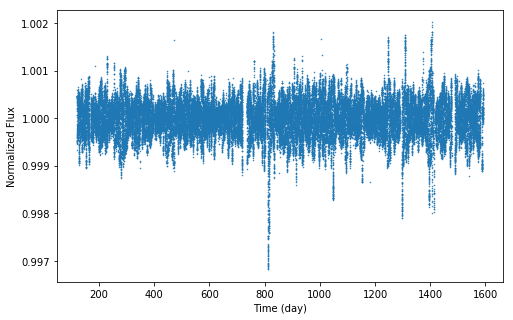

In [28]:
plt.figure(figsize=(8,5))
plt.plot(t, f, '.', ms=1.0)
plt.xlabel('Time (day)')
plt.ylabel('Normalized Flux')
# plt.savefig(os.path.join(img_dir, 'flattened_1164109.png'), dpi=200)

Text(0, 0.5, 'Normalized Flux')

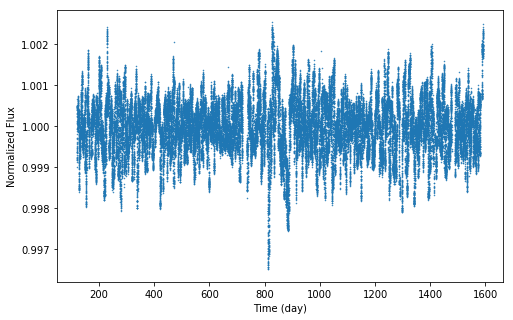

In [29]:
plt.figure(figsize=(8,5))
plt.plot(time, flux, '.', ms=1.0)
plt.xlabel('Time (day)')
plt.ylabel('Normalized Flux')
# plt.savefig(os.path.join(img_dir, 'original__1164109.png'), dpi=200)

In [30]:
fold_t, fold_f = fold(t, f, period=622.408 , t0=162.256)

In [31]:
fold_t, t

(array([5.12753609e-03, 7.46897130e-03, 2.55604072e-02, ...,
        6.22374600e+02, 6.22392695e+02, 6.22395034e+02]),
 array([ 120.53926378,  120.55969844,  120.58013299, ..., 1590.96059183,
        1590.98102638, 1591.00146113]))

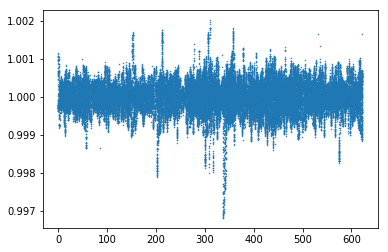

In [32]:
plt.plot(fold_t, fold_f, '.', ms=1.0)

In [33]:
len(fold_t)

65264

In [36]:
b = median_bin(fold_t, fold_f, 2001, normalize=1)

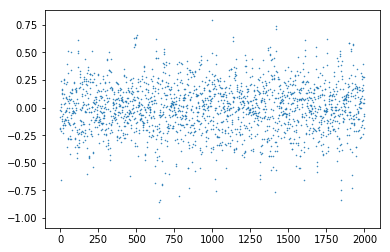

In [37]:
plt.plot(b, '.', ms=1.0)

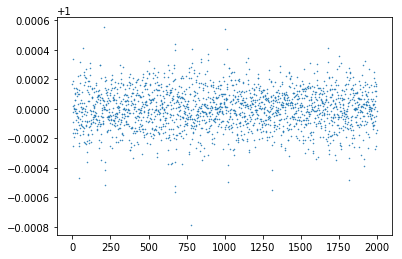

In [82]:
b = median_bin(fold_t, fold_f, 2001, normalize=0)
plt.plot(b, '.', ms=1.0)

In [53]:
lc = LightCurve(fold_t, fold_f)

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\lightkurve\lightcurve.py:208: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,


In [124]:
pc, _ = get_binned_normalized_flux_by_IDs('009347899', overwrite=1)

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\lightkurve\lightcurve.py:208: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\lightkurve\lightcurve.py:208: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\lightkurve\lightcurve.py:208: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\lightkurve\lightcurve.py:208: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,


 100.00%

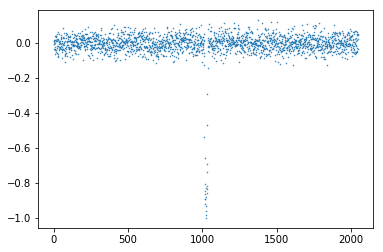

In [129]:
plt.plot(pc[0].ravel(), '.', ms=1.0)

In [122]:
l = get_binned_local_view_by_IDs('11442793', overwrite=1)

loading 1/1

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\lightkurve\lightcurve.py:208: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,


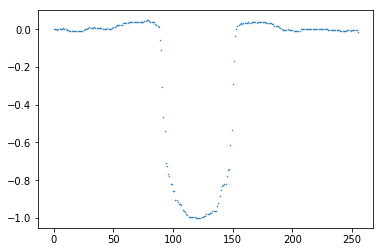

In [123]:
plt.plot(l[0].ravel(), '.', ms=1.0)

In [130]:
test = np.loadtxt('flux_1.txt')

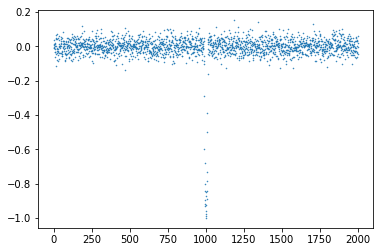

In [128]:
plt.plot(test, '.', ms=1.0)

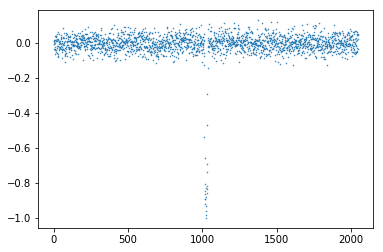

In [133]:
plt.plot(pc[0], '.', ms=1.0)